In [1]:
# Our main plotting package (must have explicit import of submodules)
import bokeh.io
import bokeh.plotting
from bokeh.io import output_file, show
from bokeh.layouts import column, row
from bokeh.plotting import figure
import sys
import glob 
import os 
import scipy.io as sio
import numpy as np
import decimal as dc
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle

from natsort import natsorted, ns

from bokeh.models import Legend

from pathlib import Path

from scipy.stats import norm

# Enable viewing Bokeh plots in the notebook
bokeh.io.output_notebook()

Loading BokehJS ...

In [2]:
mouseName = 'GF219'

Order = []

MouseDict = dict.fromkeys(['MouseName', 'daysName','WhHitR','AudHitR','FAR','dR','AudHit','WhHit','FA'])

imaging_days_new = []

AudMissInaRow = 2

AudHitRate = []
WhHitRate = []
FARate = []


WhHitRunning = []
AudHitRunning = []
FARunning = []
dprimeRunning = []


behavpath = '\\\\sv1files.epfl.ch\\Petersen-Lab\\data\\' + mouseName + '\\Recordings\\BehaviourFiles\\'

imaging_days = glob.glob(os.path.join(behavpath, "GF*"))

for n, f in enumerate(imaging_days):
    imaging_days[n] = os.path.basename(f)

imaging_days = natsorted(imaging_days)
    
if Order :
    for n, f in enumerate(imaging_days):
        imaging_days_new.append(imaging_days[Order[n]])
    imaging_days = imaging_days_new

In [3]:
imaging_days

['GF213_22112019',
 'GF213_23112019',
 'GF213_24112019',
 'GF213_25112019',
 'GF213_26112019',
 'GF213_28112019']

In [6]:
mouseName = 'GF218'

Order = []

MouseDict = dict.fromkeys(['MouseName', 'daysName','WhHitR','AudHitR','FAR','dR','AudHit','WhHit','FA'])

imaging_days_new = []

AudMissInaRow = 4

AudHitRate = []
WhHitRate = []
FARate = []


WhHitRunning = []
AudHitRunning = []
FARunning = []
dprimeRunning = []

behavpath = '\\\\sv1files.epfl.ch\\Petersen-Lab\\data\\' + mouseName + '\\Recordings\\BehaviourFiles\\'

imaging_days = glob.glob(os.path.join(behavpath, "GF*"))

for n, f in enumerate(imaging_days):
    imaging_days[n] = os.path.basename(f)

imaging_days = natsorted(imaging_days)
    
if Order :
    for n, f in enumerate(Order):
        imaging_days_new.append(imaging_days[Order[n]])
    imaging_days = imaging_days_new
    
    
for m, d in enumerate(imaging_days):
    
    behav_path = behavpath + d + '\\BehavResults.mat'
    
    print(behav_path)
    
    beh = sio.loadmat(behav_path)

    vals = beh['BehavResults'][0,0]

    keys = beh['BehavResults'][0,0].dtype.descr

    beh = np.array(vals[keys[0][0]][:][:])

    performance = np.array(beh[:,9])
    performance = performance.astype(int)
    stim = np.array(beh[:,5])
    stim = stim.astype(int)
    whstim = np.array(beh[:,6])
    whstim = whstim.astype(int)
    audstim =  np.array(beh[:,7])
    audstim = audstim.astype(int)
    
    
    
    AudHit = 0
    AudMiss = 0
    WhHit = 0
    WhMiss = 0
    FAc = 0
    CR = 0
    MissFlag = []
    WhStim = 0
    AudStim = 0
    NoStim = 0
    StopSession = False
    TotalTrials = 0
    TrialNumber = len(beh)
    RecentTrials = 150
    
    print('Number of Trials ' + str(TrialNumber))
    
    WhHitChunk = np.zeros(TrialNumber)
    AudHitChunk =  np.zeros(TrialNumber)
    FAChunk =  np.zeros(TrialNumber)
    dprime =  np.zeros(TrialNumber)
    
    for n in range(TrialNumber):
        
        ChunkPer = performance[np.max([0,n-RecentTrials]) : (n+1)]
        ChunkStim = stim[np.max([0,n-RecentTrials]) : (n+1)]
        ChunkWhStim = whstim[np.max([0,n-RecentTrials]) : (n+1)]
        ChunkAuStim = audstim[np.max([0,n-RecentTrials]) : (n+1)]
        WhHitChunk[n] = sum((ChunkPer == 2))/sum((ChunkWhStim == 1))        
        AudHitChunk[n] = sum((ChunkPer == 3))/sum((ChunkAuStim == 1))
        FAChunk[n] = sum((ChunkPer == 5))/sum((ChunkStim == 0))
        Half_WhHit = 0.5/(sum((ChunkPer == 2)) + sum((ChunkPer == 0)))
        Half_FA = 0.5/(sum((ChunkPer == 5)) + sum((ChunkPer == 4)) ) 
        
        if WhHitChunk[n] == 1:
            
            WHit = 1-Half_WhHit
            
        elif WhHitChunk[n] == 0:
            
            WHit = Half_WhHit
        else:
            WHit = WhHitChunk[n]
            
        if FAChunk[n] == 1:
            
            FA = 1-Half_FA
            
        elif FAChunk[n] == 0:
            
            FA = Half_FA
            
        else:
            FA = FAChunk[n]
            
        dprime[n] = norm.ppf(WHit) - norm.ppf(FA)
        
        
    
    p = bokeh.plotting.figure(
    width=600,
    height=400,
    x_axis_label='Trial Number',
    y_axis_label='AudHit/WhHit/FA',
    x_range=(1, TrialNumber),
    #title= mouseName + '|' + d 
    title = mouseName + '|' + d 
    
    )
    
    
    dp = bokeh.plotting.figure(
    width=500,
    height=300,
    x_axis_label='Trial Number',
    y_axis_label='dprime',
    x_range=(1, TrialNumber),
    title= mouseName + '|' + d 
    
    )
    

    p.yaxis.axis_label_text_font_style = "bold"
    p.xaxis.axis_label_text_font_style = "bold"
    p.title.align = 'center'
    
    dp.yaxis.axis_label_text_font_style = "bold"
    dp.xaxis.axis_label_text_font_style = "bold"
    dp.title.align = 'center'
    

    audh = p.line(
    x= range(TrialNumber),
    y= np.array(AudHitChunk),
    line_join='bevel',
    line_width=2,
    color = 'blue',
    )
    
    fa = p.line(
    x= range(TrialNumber),
    y= np.array(FAChunk),
    line_join='bevel',
    line_width=2,
    color = 'red',
    )
    
       
    whhit = p.line(
    x= range(TrialNumber),
    y= np.array(WhHitChunk),
    line_join='bevel',
    line_width=2,
    color = 'black',
    )
    
    d = dp.line(
    x= range(TrialNumber),
    y= np.array(dprime),
    line_join='bevel',
    line_width=2,
    color = 'green',
    )
    
    legend = Legend(items=[
    ("AudHit" , [audh]),
    ("WhHit" , [whhit]),
    ("FA" , [fa])   
    ], location="center")
    
    p.add_layout(legend, 'right')
    
    p.legend.click_policy="hide"
    

    bokeh.io.show(row(dp,p))
    
    WhHitRunning.append(WhHitChunk)
    AudHitRunning.append(AudHitChunk)
    FARunning.append(FAChunk)
    dprimeRunning.append(dprime)
    
    
    for k in range(TrialNumber):
        
        if not(StopSession):
            
            TotalTrials += 1

            if performance[k] == 0:

                WhMiss += 1 

                if len(MissFlag) < AudMissInaRow:

                    MissFlag.append(0)
                else:

                    MissFlag = MissFlag[1::]
                    MissFlag.append(0)

                if (sum(MissFlag) == AudMissInaRow):

                    print(str(AudMissInaRow) + 'AudMiss in row detected')

                    StopSession = True

            elif performance[k] == 1:

                AudMiss += 1

                if len(MissFlag) < AudMissInaRow:

                    MissFlag.append(1)
                else:

                    MissFlag = MissFlag[1::]
                    MissFlag.append(1)

                if (sum(MissFlag) == AudMissInaRow):

                    print(str(AudMissInaRow) + 'AudMiss in row detected')

                    StopSession = True

            elif performance[k] == 2:

                WhHit += 1

                if len(MissFlag) < AudMissInaRow:

                    MissFlag.append(0)
                else:

                    MissFlag = MissFlag[1::]
                    MissFlag.append(0)

                if (sum(MissFlag) == AudMissInaRow):

                    print(str(AudMissInaRow) + 'AudMiss in row detected')

                    StopSession = True

            elif performance[k] == 3:

                AudHit += 1
                

                if len(MissFlag) < AudMissInaRow:
                    MissFlag.append(0)
                else:

                    MissFlag = MissFlag[1::]
                    MissFlag.append(0)

                if (sum(MissFlag) == AudMissInaRow):

                    print(str(AudMissInaRow) + 'AudMiss in row detected')

                    StopSession = True

            elif performance[k] == 4:

                CR += 1

                if len(MissFlag) < AudMissInaRow:

                    MissFlag.append(0)
                else:

                    MissFlag = MissFlag[1::]
                    MissFlag.append(0)

                if (sum(MissFlag) == AudMissInaRow):

                    print(str(AudMissInaRow) + 'AudMiss in row detected')

                    StopSession = True

            elif performance[k] == 5:

                FAc += 1

                if len(MissFlag) < AudMissInaRow:

                    MissFlag.append(0)
                else:

                    MissFlag = MissFlag[1::]
                    MissFlag.append(0)

                if (sum(MissFlag) == AudMissInaRow):
                
                    print(str(AudMissInaRow) + 'AudMiss in row detected')

                    StopSession = True
                    
            
                    
            if whstim[k] == 1:
                
                WhStim += 1
                
            if audstim[k] == 1:
                
                AudStim += 1
                
            if  stim[k] == 0:
                
                NoStim += 1
                
            
    AudHitRate.append(AudHit/AudStim)
    
    if WhStim == 0:   
        WhHitRate.append(0.0)
    else:
        WhHitRate.append(WhHit/WhStim)
            
    FARate.append(FAc/NoStim)
    

MouseDict = { 'MouseName' : mouseName,
              'daysName' : imaging_days,
              'WhHitR' : WhHitRunning,
              'AudHitR' : AudHitRunning,
              'FAR' : FARunning,
              'dR' : dprimeRunning,
              'AudHit' : AudHitRate,
              'WhHit' : WhHitRate,
              'FA' : FARate
}

      


\\sv1files.epfl.ch\Petersen-Lab\data\GF218\Recordings\BehaviourFiles\GF218_22112019\BehavResults.mat
Number of Trials 417


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:89: RuntimeWarning: invalid value encountered in long_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:90: RuntimeWarning: invalid value encountered in long_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:92: RuntimeWarning: divide by zero encountered in true_divide


\\sv1files.epfl.ch\Petersen-Lab\data\GF218\Recordings\BehaviourFiles\GF218_23112019\BehavResults.mat
Number of Trials 363


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:91: RuntimeWarning: invalid value encountered in long_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: RuntimeWarning: divide by zero encountered in true_divide


\\sv1files.epfl.ch\Petersen-Lab\data\GF218\Recordings\BehaviourFiles\GF218_24112019\BehavResults.mat
Number of Trials 437


\\sv1files.epfl.ch\Petersen-Lab\data\GF218\Recordings\BehaviourFiles\GF218_25112019\BehavResults.mat
Number of Trials 548


\\sv1files.epfl.ch\Petersen-Lab\data\GF218\Recordings\BehaviourFiles\GF218_26112019\BehavResults.mat
Number of Trials 501


\\sv1files.epfl.ch\Petersen-Lab\data\GF218\Recordings\BehaviourFiles\GF218_28112019\BehavResults.mat
Number of Trials 547


\\sv1files.epfl.ch\Petersen-Lab\data\GF218\Recordings\BehaviourFiles\GF218_29112019\BehavResults.mat
Number of Trials 404


In [6]:
p = bokeh.plotting.figure(
    width=700,
    height=500,
    x_axis_label='Days',
    y_axis_label='AudHit/WhHit/FA',
    title= mouseName  
    )

p.yaxis.axis_label_text_font_style = "bold"
p.xaxis.axis_label_text_font_style = "bold"
p.title.align = 'center'


audh = p.line(
x= range(len(imaging_days)),
y= np.array(MouseDict['AudHit']),
line_join='bevel',
line_width=2,
color = 'blue',
)

fa = p.line(
x= range(len(imaging_days)),
y= np.array(MouseDict['FA']),
line_join='bevel',
line_width=2,
color = 'red',
)


whhit = p.line(
x= range(len(imaging_days)),
y= np.array(MouseDict['WhHit']),
line_join='bevel',
line_width=2,
color = 'black',
)

bokeh.io.show(p)    

In [116]:
savingPath = '\\\\sv1files.epfl.ch\\Petersen-Lab\\analysis\\Georgios_Foustoukos\\' + mouseName + "\\Behaviour\\"

if not(os.path.exists(savingPath)):
    os.mkdir(savingPath)

filePath = '\\\\sv1files.epfl.ch\\Petersen-Lab\\analysis\\Georgios_Foustoukos\\' + mouseName + "\\Behaviour\\" + mouseName + '_Bhv.p'


with open(filePath, 'wb') as fp:
    pickle.dump(MouseDict, fp, protocol=pickle.HIGHEST_PROTOCOL)

In [24]:
Order = []

MouseDict = dict.fromkeys(['MouseName', 'daysName','WhHitR','AudHitR','FAR','dR','AudHit','WhHit','FA'])

imaging_days_new = []

AudMissInaRow = 10

AudHitRate = []
WhHitRate = []
FARate = []


WhHitRunning = []
AudHitRunning = []
FARunning = []
dprimeRunning = []

behavpath = '\\\\sv1files.epfl.ch\\Petersen-Lab\\data\\' + mouseName + '\\Recordings\\BehaviourFiles\\'

imaging_days = glob.glob(os.path.join(behavpath, "GF*"))

for n, f in enumerate(imaging_days):
    imaging_days[n] = os.path.basename(f)

imaging_days = natsorted(imaging_days)
    
if Order :
    for n, f in enumerate(Order):
        imaging_days_new.append(imaging_days[Order[n]])
    imaging_days = imaging_days_new
    
d = imaging_days[3]


behav_path = behavpath + d + '\\BehavResults.mat'

print(behav_path)

beh = sio.loadmat(behav_path)

vals = beh['BehavResults'][0,0]

keys = beh['BehavResults'][0,0].dtype.descr

beh = np.array(vals[keys[0][0]][:][:])

performance = np.array(beh[:,9])
performance = performance.astype(int)
stim = np.array(beh[:,5])
stim = stim.astype(int)
whstim = np.array(beh[:,6])
whstim = whstim.astype(int)
audstim =  np.array(beh[:,7])
audstim = audstim.astype(int)



AudHit = 0
AudMiss = 0
WhHit = 0
WhMiss = 0
FAc = 0
CR = 0
MissFlag = []
WhStim = 0
AudStim = 0
NoStim = 0
StopSession = False
TotalTrials = 0
TrialNumber = len(beh)
RecentTrials = 150

print('Number of Trials ' + str(TrialNumber))

WhHitChunk = np.zeros(TrialNumber)
AudHitChunk =  np.zeros(TrialNumber)
FAChunk =  np.zeros(TrialNumber)
dprime =  np.zeros(TrialNumber)

for n in range(TrialNumber):

    ChunkPer = performance[np.max([0,n-RecentTrials]) : (n+1)]
    ChunkStim = stim[np.max([0,n-RecentTrials]) : (n+1)]
    ChunkWhStim = whstim[np.max([0,n-RecentTrials]) : (n+1)]
    ChunkAuStim = audstim[np.max([0,n-RecentTrials]) : (n+1)]
    WhHitChunk[n] = sum((ChunkPer == 2))/sum((ChunkWhStim == 1))        
    AudHitChunk[n] = sum((ChunkPer == 3))/sum((ChunkAuStim == 1))
    FAChunk[n] = sum((ChunkPer == 5))/sum((ChunkStim == 0))
    Half_WhHit = 0.5/(sum((ChunkPer == 2)) + sum((ChunkPer == 0)))
    Half_FA = 0.5/(sum((ChunkPer == 5)) + sum((ChunkPer == 4)) ) 

    if WhHitChunk[n] == 1:

        WHit = 1-Half_WhHit

    elif WhHitChunk[n] == 0:

        WHit = Half_WhHit
    else:
        WHit = WhHitChunk[n]

    if FAChunk[n] == 1:

        FA = 1-Half_FA

    elif FAChunk[n] == 0:

        FA = Half_FA

    else:
        FA = FAChunk[n]

    dprime[n] = norm.ppf(WHit) - norm.ppf(FA)



p = bokeh.plotting.figure(
width=600,
height=400,
x_axis_label='Trial Number',
y_axis_label='AudHit/WhHit/FA',
x_range=(1, TrialNumber),
#title= mouseName + '|' + d 
title = 'Single-session learning paradigm'

)


dp = bokeh.plotting.figure(
width=500,
height=300,
x_axis_label='Trial Number',
y_axis_label='dprime',
x_range=(1, TrialNumber),
title= mouseName + '|' + d 

)


p.yaxis.axis_label_text_font_style = "bold"
p.xaxis.axis_label_text_font_style = "bold"
p.title.align = 'center'

dp.yaxis.axis_label_text_font_style = "bold"
dp.xaxis.axis_label_text_font_style = "bold"
dp.title.align = 'center'


audh = p.line(
x= range(TrialNumber),
y= np.array(AudHitChunk),
line_join='bevel',
line_width=2,
color = 'blue',
)

fa = p.line(
x= range(TrialNumber),
y= np.array(FAChunk),
line_join='bevel',
line_width=2,
color = 'red',
)


whhit = p.line(
x= range(TrialNumber),
y= np.array(WhHitChunk),
line_join='bevel',
line_width=2,
color = 'black',
)

d = dp.line(
x= range(TrialNumber),
y= np.array(dprime),
line_join='bevel',
line_width=2,
color = 'green',
)

legend = Legend(items=[
("AudHit" , [audh]),
("WhHit" , [whhit]),
("FA" , [fa])   
], location="center")

p.add_layout(legend, 'right')

p.legend.click_policy="hide"


bokeh.io.show(row(dp,p))

WhHitRunning.append(WhHitChunk)
AudHitRunning.append(AudHitChunk)
FARunning.append(FAChunk)
dprimeRunning.append(dprime)


for k in range(TrialNumber):

    if not(StopSession):

        TotalTrials += 1

        if performance[k] == 0:

            WhMiss += 1 

            if len(MissFlag) < AudMissInaRow:

                MissFlag.append(0)
            else:

                MissFlag = MissFlag[1::]
                MissFlag.append(0)

            if (sum(MissFlag) == AudMissInaRow):

                print(str(AudMissInaRow) + 'AudMiss in row detected')

                StopSession = True

        elif performance[k] == 1:

            AudMiss += 1

            if len(MissFlag) < AudMissInaRow:

                MissFlag.append(1)
            else:

                MissFlag = MissFlag[1::]
                MissFlag.append(1)

            if (sum(MissFlag) == AudMissInaRow):

                print(str(AudMissInaRow) + 'AudMiss in row detected')

                StopSession = True

        elif performance[k] == 2:

            WhHit += 1

            if len(MissFlag) < AudMissInaRow:

                MissFlag.append(0)
            else:

                MissFlag = MissFlag[1::]
                MissFlag.append(0)

            if (sum(MissFlag) == AudMissInaRow):

                print(str(AudMissInaRow) + 'AudMiss in row detected')

                StopSession = True

        elif performance[k] == 3:

            AudHit += 1


            if len(MissFlag) < AudMissInaRow:
                MissFlag.append(0)
            else:

                MissFlag = MissFlag[1::]
                MissFlag.append(0)

            if (sum(MissFlag) == AudMissInaRow):

                print(str(AudMissInaRow) + 'AudMiss in row detected')

                StopSession = True

        elif performance[k] == 4:

            CR += 1

            if len(MissFlag) < AudMissInaRow:

                MissFlag.append(0)
            else:

                MissFlag = MissFlag[1::]
                MissFlag.append(0)

            if (sum(MissFlag) == AudMissInaRow):

                print(str(AudMissInaRow) + 'AudMiss in row detected')

                StopSession = True

        elif performance[k] == 5:

            FAc += 1

            if len(MissFlag) < AudMissInaRow:

                MissFlag.append(0)
            else:

                MissFlag = MissFlag[1::]
                MissFlag.append(0)

            if (sum(MissFlag) == AudMissInaRow):

                print(str(AudMissInaRow) + 'AudMiss in row detected')

                StopSession = True



        if whstim[k] == 1:

            WhStim += 1

        if audstim[k] == 1:

            AudStim += 1

        if  stim[k] == 0:

            NoStim += 1


AudHitRate.append(AudHit/AudStim)

WhHitRate.append(WhHit/WhStim)

FARate.append(FAc/NoStim)


\\sv1files.epfl.ch\Petersen-Lab\data\GF213\Recordings\BehaviourFiles\GF213_25112019\BehavResults.mat
Number of Trials 653


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:87: RuntimeWarning: invalid value encountered in long_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:88: RuntimeWarning: invalid value encountered in long_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:89: RuntimeWarning: invalid value encountered in long_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:90: RuntimeWarning: divide by zero encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:91: RuntimeWarning: divide by zero encountered in true_divide


10AudMiss in row detected


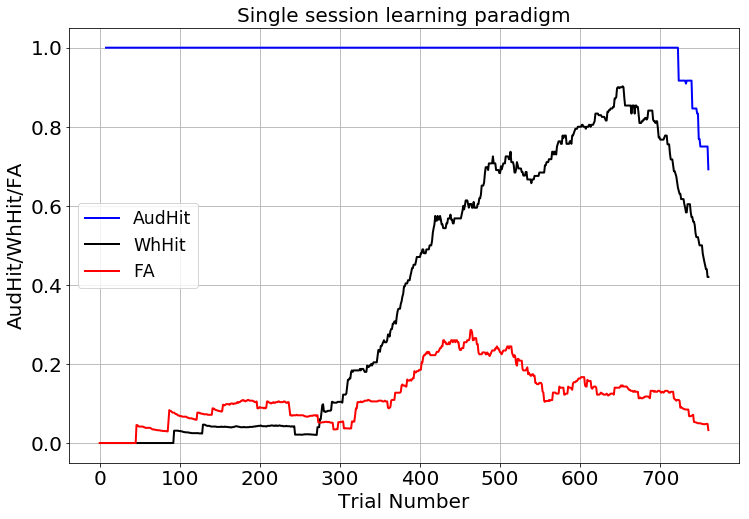

In [38]:
beingsaved = plt.figure(figsize=(12, 8))
plt.plot(range(TrialNumber),np.array(AudHitChunk),linewidth = 2,color = 'b',label = 'AudHit')
plt.plot(range(TrialNumber),np.array(WhHitChunk),linewidth = 2,color = 'k',label = 'WhHit')
plt.plot(range(TrialNumber),np.array(FAChunk),linewidth = 2,color = 'r',label = 'FA')
plt.ylabel('AudHit/WhHit/FA',fontsize=20)
plt.xlabel('Trial Number',fontsize=20)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.grid(True,linestyle='-')
plt.title('Single session learning paradigm',fontsize=20)
plt.legend(loc='center left',fontsize = 'xx-large')
beingsaved.savefig('D:\\test.eps',format='eps', dpi=1000)

In [37]:
beingsaved.savefig('D:\\test.eps',format='eps', dpi=1000)